# Example 1
<div>
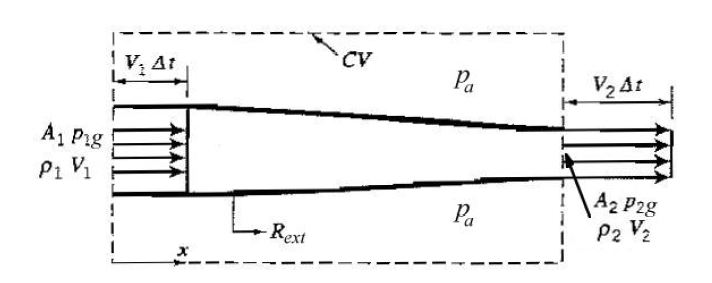
</div>

Consider the simple case shown in Figure, where the in
ow and out ow are in the same direction, and the flow is steady and one-dimensional. How can we find, for example, the force $F_D$ required to hold the duct in place as the fluid 
flows through it?

# Solution
We need to find the force $F_D$ to hold the duct in place. It is a good idea to start with Newton's 2nd law written in a control volume (CV). 
Here are the steps. 
1. **choose a CV. here we used the volume enclosed by the dashed line given in the problem**. 
Note: in most problems, the CV will not be given. Then it is your responsiblity to choose the right CV. 
2. **Apply the momentum equation, notice that on the left hand size (LHS) we have to identify all the external forces applied to the control volume, including force induced by pressure, weights, exerted forces, etc. On the right hand side (RHS), we have to evaluate those integrals.** $$\sum \vec{F}=\dfrac{d(m\vec{V})}{dt}=\dfrac{d}{dt}\int_{cv}{\rho\vec{V}}d\vee+\int_{cs}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA$$ 
3. **identify all the forces, here we only have forces induced by pressure and external reaction force $F_D$** 
$$\sum\vec{F}=p_{1g}A_1\vec{i}-p_{2g}A_2\vec{i}+F_D\vec{i}$$
note: as the pressure is uniform, so we can calculate the pressure as $p_{1g}A_1$. If it is not uniform, we have to calcuate it using integral $F_p=\int pdA$
4. **on RHS, the volume integral vanishes due to steady state**
$$\dfrac{d}{dt}\int_{cv}{\rho\vec{V}}d\vee=0$$
5. **RHS, the control surface can be breaked into 4 surfaces (2D problem), the top and bottom surface integral go to zero because there is no fluid velocity there, so we only have the surface integral on the inlet (left) and outlet (right) cross sections**

$$\begin{align}
\int_{cs}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA &= \int_{left}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA+ \int_{right}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA
\\
& = \int_{left}\rho_1 V_1\vec{i}(\underbrace{V_1\vec{i}}_{\vec{V}_r=\vec{V}_1}\cdot(\underbrace{-\vec{i}}_{\vec{n}_1}))dA + \int_{right}\rho_2 V_2\vec{i}(\underbrace{V_2\vec{i}}_{\vec{V}_r=\vec{V
}_2}\cdot\underbrace{\vec{i}}_{\vec{n}_2})dA\\
& = \left[-\rho_1V_1^2\int_{left}dA\right]\vec{i}+\left[\rho_2V_2^2\int_{right}dA\right]\vec{i}\\
& = \left[-\rho_1V_1^2A_1\right]\vec{i}+\left[\rho_2V_2^2A_2\right]\vec{i}
\end{align}
$$
6 **LHS == RHS, we have**
$$\sum\vec{F}=p_{1g}A_1\vec{i}-p_{2g}A_2\vec{i}+F_D\vec{i}= \left[-\rho_1V_1^2A_1\right]\vec{i}+\left[\rho_2V_2^2A_2\right]\vec{i}$$
two vectors have to be the same, we need to let the components to be the same. we only have $x$ component here, so 
$$p_{1g}A_1-p_{2g}A_2+F_D=-\rho_1V_1^2A_1+\rho_2V_2^2A_2$$
solve it for $F_D$ we get
$$F_D=-(p_{1g}A_1-p_{2g}A_2)+\rho_2A_2V_2^2-\rho_1A_1V_1^2$$




In [46]:
import sympy as sp # use symbolic python taking derivative
import handcalcs.render # render
import numpy as np # numerical python library
import matplotlib.pyplot as plt
A1, A2, rho1, rho2, V1, V2, P1, P2, F_D= sp.symbols('A1 A2 rho1 rho2 V1 V2 P1 P2 F_D') # define it as symbols
sp.init_printing(use_unicode=True)

# conservation of mass
eq1=sp.Eq(rho1*A1*V1 - rho2*A2*V2,0)
eq1

In [47]:
# conservationo f momentum
eq2 = sp.Eq(P1*A1 - P2*A2+F_D, -rho1*V1*V1*A1+rho2*V2*V2*A2)
eq2

In [48]:
sp.solve([eq1,eq2],F_D)

# Example 2

<div>
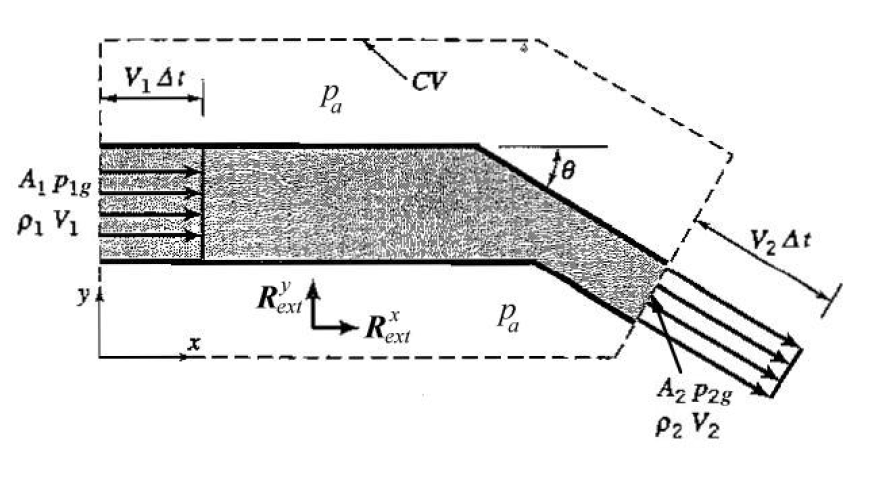
</div>

Consider now the case shown in Figure above, where the inlet and outlet directions are not
aligned. All other conditions are the same as in the previous example; the 
flow is steady,
one-dimensional, and we neglect friction and gravity. Also, $p_{1g}$ and $p_{2g}$ are the gauge
pressures over the inlet and outlet areas, respectively. What is the reaction force $\vec{R}_{ext}$? 

# Solution

We need to find the force $\vec{R}_{ext}$ to hold the duct in place. It is a good idea to start with Newton's 2nd law written in a control volume (CV). 
1. **choose a CV. here we used the volume enclosed by the dashed line given in the problem**. 
Note: in most problems, the CV will not be given. Then it is your responsiblity to choose the right CV. 
2. **Apply the momentum equation, notice that on the left hand size (LHS) we have to identify all the external forces applied to the control volume, including force induced by pressure, weights, exerted forces, etc. On the right hand side (RHS), we have to evaluate those integrals.** $$\sum \vec{F}=\dfrac{d(m\vec{V})}{dt}=\dfrac{d}{dt}\int_{cv}{\rho\vec{V}}d\vee+\int_{cs}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA$$ 
3. **identify all the forces, here we only have forces induced by pressure and external reaction force $F_D$** 
$$\sum\vec{F}=p_{1g}A_1\vec{i}-p_{2g}A_2\vec{n}_2+\vec{R}_{ext}$$
(note: as the pressure is uniform, so we can calculate the pressure as $p_{1g}A_1$. If it is not uniform, we have to calcuate it using integral $F_p=\int pdA$)
How to find $\vec{n}_2$? well the angle $\theta$ is given, we know that $\vec{n}_2= \cos\theta \vec{i}-\sin\theta\vec{j}$. So the above equation can be simplified as
$$\sum\vec{F}=p_{1g}A_1\vec{i}-p_{2g}A_2(\cos\theta \vec{i}-\sin\theta\vec{j})+\vec{R}_{ext}$$
4. **on RHS, the volume integral vanishes due to steady state**
$$\dfrac{d}{dt}\int_{cv}{\rho\vec{V}}d\vee=0$$
5. **RHS, the control surface can be breaked into 4 surfaces (2D problem), the top and bottom surface integral go to zero because there is no fluid velocity there, so we only have the surface integral on the inlet (left) and outlet (right) cross sections**

$$\begin{align}
\int_{cs}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA &= \int_{left}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA+ \int_{right}\rho\vec{V}(\vec{V}_r\cdot\vec{n})dA
\\
& = \int_{left}\rho_1 V_1\vec{i}(\underbrace{V_1\vec{i}}_{\vec{V}_r=\vec{V}_1}\cdot(\underbrace{-\vec{i}}_{\vec{n}_1}))dA + \int_{right}\rho_2 V_2\vec{n}_2(\underbrace{V_2\vec{n}_2}_{\vec{V}_r=\vec{V
}_2}\cdot\vec{n}_2)dA\\
& = -\int_{left}\rho_1 V_1\vec{i}(V_1)dA + \int_{right}\rho_2 V_2(\cos\theta \vec{i}-\sin\theta\vec{j})(V_2)dA\\
& = \left[-\rho_1V_1^2\int_{left}dA\right]\vec{i}+\left[\rho_2V_2^2\cos\theta\int_{right}dA\right]\vec{i}-\left[\rho_2V_2^2\sin\theta\int_{right}dA\right]\vec{j}\\
& = \left[-\rho_1V_1^2A_1+\rho_2V_2^2A_2\cos\theta\right]\vec{i}-\left[\rho_2V_2^2A_2\sin\theta \right]\vec{j}
\end{align}
$$
6 **LHS == RHS, we have**
$$\sum\vec{F}=p_{1g}A_1\vec{i}-p_{2g}A_2(\cos\theta \vec{i}-\sin\theta\vec{j})+\vec{R}_{ext}= \left[-\rho_1V_1^2A_1+\rho_2V_2^2A_2\cos\theta\right]\vec{i}-\rho_2V_2^2A_2\sin\theta \vec{j}$$
two vectors have to be the same, we need to let the components to be the same. So in $x$ component, 

$$p_{1g}A_1-p_{2g}A_2\cos\theta+R_{ext}^x=-\rho_1V_1^2A_1+\rho_2V_2^2A_2\cos\theta$$
in $y$ component, 
$$p_{2g}A_2\sin\theta + R_{ext}^y =-\rho_2V_2^2A_2\sin\theta  $$
solve them we can get

$$R_{ext}^x=-(p_{1g}A_1-p_{2g}A_2\cos\theta)-(\rho_1A_1V_1^2-\rho_2A_2V_2^2\cos\theta)$$
$$R_{ext}^y=-p_{2g}A_2\sin\theta-\rho_2A_2V_2^2\sin\theta
$$

that would be the end of the solution!

## Discussion
As you can see from these two examples, the procedure are exactly the same!


In [49]:
import sympy as sp # use symbolic python taking derivative
import handcalcs.render # render
import numpy as np # numerical python library
import matplotlib.pyplot as plt

A1, A2, rho1, rho2, V1, V2, P1, P2, F_x, F_y, theta= sp.symbols('A1 A2 rho1 rho2 V1 V2 P1 P2 F_x, F_y theta') # define it as symbols
sp.init_printing(use_unicode=True)

# conservation of mass
eq1_mass=sp.Eq(rho1*A1*V1 - rho2*A2*V2,0)
eq1_mass

In [50]:
# conservation of momentum in x
eq_fx = sp.Eq(P1*A1-P2*A2*sp.cos(theta)+F_x, -rho1*V1*V1*A1 + rho2*V2*V2*A2*sp.cos(theta))
eq_fx

In [51]:
# conservation of momentum in y
eq_fy = sp.Eq(P2*A2*sp.sin(theta)+F_y,  - rho2*V2*V2*A2*sp.sin(theta))
eq_fy

In [52]:
sp.solve([eq1_mass, eq_fx],F_x)

In [53]:
sp.solve([eq1_mass, eq_fy],F_y)